In [ ]:
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [817]:
j1 = 2 # кількість змінних по х1
j2 = 2 # кількість змінних по х2
j3 = 3 # кількість змінних по х3
m = 4 # кількість змінних по y

pow_polin_cheb = 2 # степінь полінома чебешева
file_name = 'table_51_f_n1.csv'

In [818]:
koef = [j1, j2, j3]


new_df = pd.read_csv(file_name, index_col='Unnamed: 0')
#new_df = pd.read_csv(file_name, index_col='Unnamed: 0')

In [819]:
def normilize(x, MIN_p, MAX_p):
    return (x - MIN_p) / (MAX_p - MIN_p)

# def back_to_norm(x, MIN_p, MAX_p):
#     return (MAX_p - MIN_p)*x + MIN_p

In [820]:
# MAX_col = []
# MIN_col = []

# for col in df.columns:
#     MAX_one = max(df[col])
#     MAX_col.append(MAX_one)
#     MAX = [MAX_one for i in range(45)]

#     MIN_one = min(df[col])
#     MIN_col.append(MIN_one)
#     MIN = [MIN_one for i in range(45)]

#     ser = pd.Series(np.array(list(map(normilize, df[col], MIN, MAX))), index=df.index)
#     new_df[col] = ser

In [821]:
def get_T(x, deg):
    if (deg == 0): return 1
    elif (deg == 1): return -1+2*x
    else: return (2*(-1+2*x)*get_T(x,deg-1) - get_T(x,deg-2))

In [822]:
rivn_n = []
for i in range(45):
    p = 0
    rivn = []
    for kef in koef:
        p += 1
        for j_i in range(0,kef):
            for k in range(pow_polin_cheb):
                rivn.append(get_T(new_df['x%d%d'%(p,(j_i+1))].iloc[i], k))
    rivn_n.append(rivn)


matrix_A = np.array(rivn_n)

In [ ]:
# for i in range(45):
#     row_lin = [        
#                     get_T(new_df['x11'].iloc[i], 0), get_T(new_df['x11'].iloc[i], 1), 
#                     get_T(new_df['x12'].iloc[i], 0), get_T(new_df['x12'].iloc[i], 1), 
#                     get_T(new_df['x21'].iloc[i], 0), get_T(new_df['x21'].iloc[i], 1), 
#                     get_T(new_df['x22'].iloc[i], 0), get_T(new_df['x22'].iloc[i], 1), 
#                     get_T(new_df['x31'].iloc[i], 0), get_T(new_df['x31'].iloc[i], 1), 
#                     get_T(new_df['x32'].iloc[i], 0), get_T(new_df['x32'].iloc[i], 1), 
#                     get_T(new_df['x33'].iloc[i], 0), get_T(new_df['x33'].iloc[i], 1), 
#               ]
#     A.append(row_lin)


# matrix_A = np.array(A)
# matrix_A

In [835]:
# знаходження коефіцієнтів лямбда
b_vec = []
Lambda = []

for i in range(m):
    b_vec.append(np.array(list(new_df['Y%d'%(i+1)])))
    Lambda.append(la.lstsq(matrix_A, b_vec[i])[0])

In [836]:
def phi(lan_ji_k, x):
    summ = 0
    for i in range(pow_polin_cheb):
        summ += lan_ji_k[i]*get_T(x,i)
    return summ

In [837]:
matrix_phi_X1 = [[] for i in range(m)]
matrix_phi_X2 = [[] for i in range(m)]
matrix_phi_X3 = [[] for i in range(m)]


for n in range(m):
    for i in range(45):
        line_X1_i = [phi(Lambda[n][pow_polin_cheb*z:pow_polin_cheb*(z+1)],new_df['x1%d'%(z+1)].iloc[i]) for z in range(j1)]
        matrix_phi_X1[n].append(line_X1_i)

        line_X2_i = [phi(Lambda[n][pow_polin_cheb*(z+2):pow_polin_cheb*(z+3)],new_df['x2%d'%(z+1)].iloc[i]) for z in range(j2)]
        matrix_phi_X2[n].append(line_X2_i)

        line_X3_i = [phi(Lambda[n][pow_polin_cheb*(z+4):pow_polin_cheb*(z+5)],new_df['x3%d'%(z+1)].iloc[i]) for z in range(j3)]
        matrix_phi_X3[n].append(line_X3_i) 
    
    


matrix_phi_X1_np = [np.array(matrix_phi_X1[j]) for j in range(len(matrix_phi_X1))]
matrix_phi_X2_np = [np.array(matrix_phi_X2[j]) for j in range(len(matrix_phi_X2))]
matrix_phi_X3_np = [np.array(matrix_phi_X3[j]) for j in range(len(matrix_phi_X3))]

In [838]:
# знаходження коефіцієнтів А для кожного У(1..m)

a_x1 = []
a_x2 = []
a_x3 = []

for n in range(m):
    a_x1.append(la.lstsq(matrix_phi_X1_np[n], b_vec[n])[0])
    a_x2.append(la.lstsq(matrix_phi_X2_np[n], b_vec[n])[0])
    a_x3.append(la.lstsq(matrix_phi_X3_np[n], b_vec[n])[0])

In [839]:
# знаходження коефіцієнтів C 

matrix_F = [[] for i in range(m)]

for n in range(m):
    for i in range(45):
        line_c = [
                  sum([ a_x1[n][z]*phi(Lambda[n][pow_polin_cheb*z:pow_polin_cheb*(z+1)],new_df['x1%d'%(z+1)].iloc[i]) for z in range(j1)]),
                  sum([ a_x2[n][z]*phi(Lambda[n][pow_polin_cheb*(z+2):pow_polin_cheb*(z+3)],new_df['x2%d'%(z+1)].iloc[i]) for z in range(j2)]),  
                  sum([ a_x3[n][z]*phi(Lambda[n][pow_polin_cheb*(z+4):pow_polin_cheb*(z+5)],new_df['x3%d'%(z+1)].iloc[i]) for z in range(j3)]),

                 ]
        matrix_F[n].append(line_c)
    
    
matrix_F = [np.array(matrix_F[j]) for j in range(len(matrix_F))]

C = []
for n in range(m):
    C.append(la.lstsq(matrix_F[n], b_vec[n])[0])

In [840]:
y_new = [[] for i in range(m)]

for n in range(m):
    for i in range(45):
        y_new[n].append(
                         C[n][0]*(sum([ a_x1[n][z]*phi(Lambda[n][pow_polin_cheb*z:pow_polin_cheb*(z+1)],new_df['x1%d'%(z+1)].iloc[i]) for z in range(j1)])) +
                         C[n][1]*(sum([ a_x2[n][z]*phi(Lambda[n][pow_polin_cheb*(z+2):pow_polin_cheb*(z+3)],new_df['x2%d'%(z+1)].iloc[i]) for z in range(j2)])) +
                         C[n][2]*(sum([ a_x3[n][z]*phi(Lambda[n][pow_polin_cheb*(z+4):pow_polin_cheb*(z+5)],new_df['x3%d'%(z+1)].iloc[i]) for z in range(j3)]))
                       )
y_new = [np.array(y_new[j]) for j in range(m)]

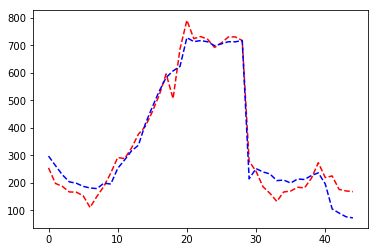

In [841]:
#plt.plot(new_df.index, f, 'b--')
plt.plot(new_df.index, new_df['Y1'], 'r--')
plt.plot(new_df.index, y_new[0], 'b--')
plt.show()

In [842]:
# y_max_ones = []
# y_min_ones = []



# for i in range(len(MAX_col)-m, len(MAX_col)):
#     y_max_ones.append([MAX_col[i] for j in range(45)])
#     y_min_ones.append([MIN_col[i] for j in range(45)])

# y_new_back = []

# for i in range(m):
#     y_new_back.append(np.array(list(map(back_to_norm,y_new[i], y_min_ones[i], y_max_ones[i]))))

In [843]:
# plt.plot(new_df.index, df['Y2'], 'r--')
# plt.plot(new_df.index, y_new_back[1], 'b--')
# plt.show()